In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data acquisition

In [25]:
df = pd.read_csv('Salary_Data.csv')

### Descriptive analysis

In [26]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [24]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


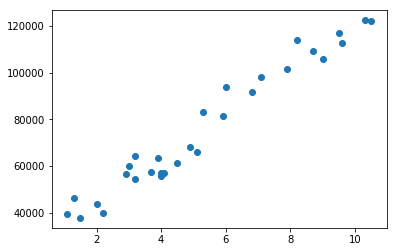

In [27]:
plt.scatter(df['YearsExperience'], df['Salary'])

### Feature Engineering

In [107]:
X = df[['YearsExperience']]
y = df['Salary']

### Split data into train and test.. generally 70, 30 split 

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [99]:
len(X_train), len(X_test), len(y_train), len(y_test)

(27, 3, 27, 3)

### Fit it to a model (Training the Model)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Evaluate

In [53]:
lr.intercept_, lr.coef_

(25998.35598148896, array([9399.57632196]))

In [101]:
testdf=lr.coef_[0] * X_test + lr.intercept_
testdf

,YearsExperience
20,89915.474971
24,107774.669983
7,56077.000212


In [111]:
lr.predict([[3.5], [6.7],[7.8]])

array([58896.87310835, 88975.51733862, 99315.05129278])

In [112]:
lr.coef_[0]*3.5 + lr.intercept_

58896.87310834962

In [102]:
testdf.columns = ['pred']
testdf

,pred
20,89915.474971
24,107774.669983
7,56077.000212


In [103]:
testdf['actual'] = y_test
testdf['ae'] = abs(testdf['pred']-testdf['actual'])
testdf['se'] = testdf['ae'] ** 2
testdf

,pred,actual,ae,se
20,89915.474971,91738.0,1822.525029,3.321597e+06
24,107774.669983,109431.0,1656.330017,2.743429e+06
7,56077.000212,54445.0,1632.000212,2.663425e+06


In [104]:
import math
print('MAE', testdf['ae'].mean())
print('MSE', testdf['se'].mean())
print('RMSE', math.sqrt(testdf['se'].mean()))

MAE 1703.6184194669138
MSE 2909483.766638085
RMSE 1705.7208935338995


In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

MAE 1703.6184194669138
MSE 2909483.766638085
RMSE 1705.7208935338995


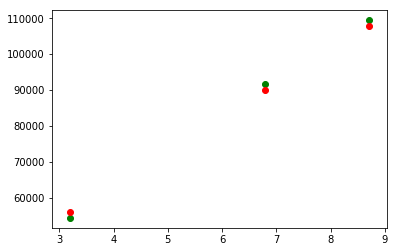

In [96]:
plt.scatter(X_test, testdf['actual'], color='green')
plt.scatter(X_test, testdf['pred'], color='red')

In [15]:
lr.predict(14)

array([157592.42448893])

In [19]:
import math

MAE 1703.6184194669138
MSE 2909483.766638085
RMSE 1705.7208935338995
